## Exploratory Analysis
This section details of the exploratory analysis, data wrangling, and data management. 

## Notes


### The Grievance Dataset is merged with the source excel file by using Vlook-up. The dataset is attached for reference 

### Problem solving Approach is done in two methods 


### Summary 
#### The banks receives several thousands complaints filed by consumers concerning the practices of finanical companies. After reviewing each complaint, the Federal Bureau of US makes an anlaysis  regarding how the complaint was  resolved and grades the bank.

## Approach-1
####  Greivance Description is identified as a separate dataset to  classify the unique 86 Banks in the dataset based on the grievances of the customers, whether the bank is following the Federal Act of US for fair  practices in Banking . This is  a unsupervised problem statement .

## Approach-2 
#### This is a supervised ML problem with all the attributes apart from the "Grievance Description" mentioned above . The "Y" label here is the column  mergedfrom the Train.csv as "BankGrade". Here we need to identify as to how efficiently the bank has handled a customer grievance and based on the feedback of the resolution provided . After analysing and preprocessing the data we will prepare the model such that it can predict the accurate Grade  for the test data 


In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
import warnings 
warnings.filterwarnings("ignore")

### Visualization 

In [3]:
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE  # Helps visualize higher dimensions data

import squarify
import plotly
import plotly.graph_objs as go

%matplotlib inline
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot


# Make graphs prettier
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 700)
#pd.set_option('display.mpl_style', 'default')
matplotlib.style.use('ggplot')
# Make the fonts bigger
matplotlib.rc('figure', figsize=(14, 7))
matplotlib.rc('font', weight='bold', size=15)

### Reading the merged file in the notebook 

In [4]:
data = pd.read_csv("GrievancesData_Train.csv", sep=",",header='infer')

In [ ]:
data

In [ ]:
data.shape

In [ ]:
# Describing the subset of data for values in each attributes
data.describe()

### We observe that BankID has 86 unique values which are similar to the train dataset. hence the merge of two files. this data includes "Bankgrade" as the last column 

### Before we begin let us calculate the Missing values on the datasets on each column 

In [5]:
#This function computes the percentage of missing data per header name for a sub-frame of the CCD.
def missing_number(dataframe, header_name):
    count = 0
    for x in dataframe[header_name]:
        try:
            if np.isnan(x):
                count+=1
        except TypeError:
            pass
    return (count)



#This function counts unique elements in columns
def count_unique(dataframe, header_name):
    z = dataframe[header_name].unique()
    return sum(1 for v in z if pd.notnull(v))

In [6]:
r = []
for col in data.columns:
    r.append([col, missing_number(data,col),count_unique(data,col)])
missing_data = pd.DataFrame(r, columns=['Column Name', 'Missing Val', 'Unique'])
print(missing_data)

             Column Name  Missing Val  Unique
0            GrievanceID            0   53680
1                 BankID            0      86
2                  State          121      59
3        DateOfGrievance            0    1222
4     Grievance_Category            0      67
5   GrievanceDescription            0   46662
6         LineOfBusiness            0       4
7     ResolutionComments            0       4
8               Disputed            0       2
9       DateOfResolution            0    1248
10             BankGrade            0       3


### We can deduce that the above data has 121 missing values in the dataset on Column State , which implies that 121 banks do not have their State information 

In [7]:
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

##### For experimentation and trial and error purposes , lets make a duplicate copy of the Non NA value data and use that for the analysis , instead of ruining the main data 

In [8]:
data_set = data

#### It is observed that for 86 unique banks there are 53680 grievances , which implies that a single bank has repeated grievances and irrespective of the grievance the "BankGrade" for all the comments on bank is either of the ('Outstanding','Defecient ','Satisfactory'). Hence if we keep the bankID as an attribute for ML it will explicitly consider the many similar charachteristic between BankID and its BankGrade and provide the same result in test data , the result will also be biased. It will no doubt provide a great accuracy but it will not be a "wise" metric to evaluate a bank 

In [9]:
## Only interested in subset of data without consumer complaints
##Taking subset of the data

df = data_set[['GrievanceID','BankID','State','DateOfGrievance','Grievance_Category','LineOfBusiness','ResolutionComments','Disputed','DateOfResolution','BankGrade']]
df.head(10)

GrievanceID    BankID    State DateOfGrievance                        Grievance_Category LineOfBusiness           ResolutionComments Disputed DateOfResolution     BankGrade
0   GID512411  Bank5279  State31       1/19/2016              Settlement process and costs       Mortgage      Closed with explanation       No        1/30/2016   outstanding
1   GID512412  Bank5287  State26       1/19/2016  Application, originator, mortgage broker       Mortgage      Closed with explanation      Yes        2/10/2016     deficient
2   GID512413  Bank5286  State14       1/19/2016                          Billing disputes    Credit card  Closed with monetary relief      Yes        2/10/2016  satisfactory
3   GID512415  Bank5279  State53       1/19/2016  Loan servicing, payments, escrow account       Mortgage      Closed with explanation       No        1/30/2016   outstanding
4   GID512417  Bank5286  State37       1/19/2016  Loan modification,collection,foreclosure       Mortgage      Closed with explanation       No        1/30/2016  satisfactory
5   GID512418  Bank5237  State16       1/19/2016        Dealing with my lender or servicer   Student loan      Closed with explanation       No        2/19/2016  satisfactory
6   GID512419  Bank5257  State16       1/19/2016  Loan modification,collection,foreclosure       Mortgage      Closed with explanation      Yes        2/10/2016  satisfactory
7   GID515122  Bank5397  State27       3/19/2016                Managing the loan or lease  Consumer Loan      Closed with explanation       No        3/30/2016  satisfactory
8   GID512421  Bank5382  State14       1/19/2016  Loan servicing, payments, escrow account       Mortgage      Closed with explanation      Yes        2/10/2016  satisfactory
9   GID515125  Bank5422  State39       3/19/2016  Loan servicing, payments, escrow account       Mortgage      Closed with explanation       No        3/30/2016  satisfactory

In [10]:
df.columns

Index(['GrievanceID', 'BankID', 'State', 'DateOfGrievance', 'Grievance_Category', 'LineOfBusiness', 'ResolutionComments', 'Disputed', 'DateOfResolution', 'BankGrade'], dtype='object')

In [11]:
#Type casting
df['DateOfGrievance'] = pd.to_datetime(df['DateOfGrievance'], format='%m/%d/%Y')
df['DateOfResolution'] = pd.to_datetime(df['DateOfResolution'], format='%m/%d/%Y')



In [ ]:
#Check size and dtypes
print(df.shape)
print(data.dtypes)

##### Calculate the time bank has taken to resolve the complaint 

In [12]:
from datetime import timedelta

df['Processing_time'] = df['DateOfResolution']-df['DateOfGrievance']
df.loc[df['Processing_time']<timedelta(days=0),'DateOfResolution'] = df['DateOfGrievance']

In [13]:
df['Year'] = pd.to_datetime(df['DateOfGrievance'], format = '%d%b%Y')
df['Year']= df['Year'].dt.year

In [14]:
df['Processing_time'] = df['Processing_time'].astype('timedelta64[D]').astype(int)

In [ ]:
df

#### Graph to find out which companies received the most complaints 

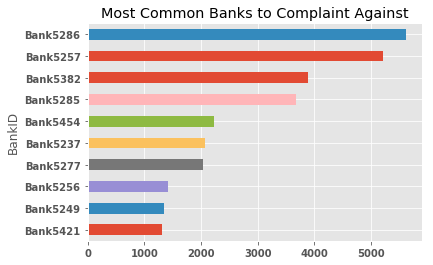

In [15]:
grp = df.groupby('BankID')
grp = grp.size().sort_values(ascending=False)
#top10 = grp[10::-1]
top10 = (grp[:10])[::-1]
top10.plot(kind='barh',title='Most Common Banks to Complaint Against')

In [ ]:
grp = df.pivot_table(index='ResolutionComments',columns='Disputed',values='DateOfGrievance',aggfunc='count')
grp

In [ ]:
df['ResolutionComments'].value_counts().plot(title="Category_distibution", kind='pie')
plt.show()

### The above pivot table gives us a general idea that Banks which gave the status as "Closed with explanation" were challenged or disputed again most number of times . An assumption would be that, customer was not given a correct explanation , also one observation can be made that maximum cases by banks were tried to resolve by "Explanation" only 

In [ ]:
## The below plot tells us that 2013 saw the maximum number of complaints and a decreasing trend in complaints post 2014


grp = df.groupby('Year')
grp.size().plot(kind='bar',title='Volume of Complaints by Year (2011/2016 partial)')

### Let us get a general idea of Complaints data as per State

In [ ]:
new_data01 = df.groupby(["State"]).size().reset_index(name="Count_of_Complaints")
new_data01.head(5)

In [ ]:
## Study of Complaints based on Line of Business of each banks 
df['LineOfBusiness'].value_counts().plot(kind='bar')

### Nature of complaint in each category of grievance 

#### Below graph explains about the grievances received in each category of grievance specified in dataset

In [ ]:
fig=plt.figure(figsize=(18, 40), dpi= 80, facecolor='w', edgecolor='k')
count_plot = sns.countplot(y = df['Grievance_Category'],order=df['Grievance_Category'].value_counts().index)
count_plot.set_ylabel('Grievance_Category')
count_plot.set_title('No. of Grievances in each Sector')
plt.xlabel('Num_of_Grievances')


##### The above chart helps us to identify that based on Grievance category , Out of the total 67  unique categories,  roughly 30 are major contributors to highlight the grievances amongst consumers

#### The below date tells us the percent rating of banks in an overview

We observe that satisfactory rating of resolution of banks is 64% and that of defecient is 26%

In [ ]:
label = pd.DataFrame(df.BankGrade.value_counts())
label.columns = ['BankGrade_cnt']
label['Bankrating'] = label.BankGrade_cnt/df.shape[0]

base = 0.972434

label

** Product **

We could see that how the banks are faring based on their various product lines 

In [ ]:
f,ax=plt.subplots(figsize=(18,8))
sns.countplot(y = 'LineOfBusiness', hue='BankGrade', data=data)
plt.show()

#### the rate of defecienct is obviously higher in credit card related issues , this could probably be the non-payment issue by customers 

### Since the columns dont add up enough to give data for ML model , frequency of occurence of various categorical columns based on the grading of banks might help . 

### Adding  these frequency columns to provide the ML algorithms as a part of Feature engineering . 

In [16]:
def freq_by_cat(data, cat):
    '''
    Input: data is the whole data set;
           cat is the categorical feature you want to calculate the frequency of each category inside this feature.
    Output: a dataframe
    '''
    
    cat = str(cat)
    # Calculate the frequency of each cat
    freq = data.groupby('%s'%cat).count()/53680
    # reset index
    freq['%s'%cat] = freq.index
    freq.columns = ['freq_by_%s'%cat, '%s'%cat]
    freq = freq.reset_index(drop=True)
    
    return freq

** Issue **

New features:

- freq_by_issue: Frequency of issue

In [17]:
Issue = df[['Grievance_Category', 'BankGrade']]
freq_by_issue = freq_by_cat(Issue, 'Grievance_Category')
#freq_by_issue

In [18]:
# One new feature: freq_by_issue
df = pd.merge(df, freq_by_issue, on='Grievance_Category')

In [ ]:
df.head()

** LineOfBusiness **

New features:

- freq_by_business: Frequency of business

In [19]:
Business = df[['LineOfBusiness', 'BankGrade']]

freq_by_business = freq_by_cat(Business, 'LineOfBusiness')

In [20]:
# One new feature: freq_by_product
df = pd.merge(df, freq_by_business, on='LineOfBusiness')

** State **

New features:

- freq_by_stateID: Frequency of State

In [21]:
State = df[['State', 'BankGrade']]

freq_by_State = freq_by_cat(State, 'State')

In [22]:
# One new feature: freq_by_state
df = pd.merge(df, freq_by_State, on='State')

## Assigning the Labels with numerical values

In [23]:
df.BankGrade[df.BankGrade == 'deficient'] = 0
df.BankGrade[df.BankGrade == 'satisfactory'] = 1
df.BankGrade[df.BankGrade == 'outstanding'] = 2

df.BankGrade = df.BankGrade.astype('int')

In [24]:
df

GrievanceID    BankID    State DateOfGrievance                        Grievance_Category      ...       Processing_time  Year freq_by_Grievance_Category freq_by_LineOfBusiness  freq_by_State
0       GID512411  Bank5279  State31      2016-01-19              Settlement process and costs      ...                    11  2016                   0.021069               0.396200       0.012593
1       GID354770  Bank5436  State31      2012-05-20              Settlement process and costs      ...                    11  2012                   0.021069               0.396200       0.012593
2       GID368849  Bank5454  State31      2012-08-18              Settlement process and costs      ...                    22  2012                   0.021069               0.396200       0.012593
3       GID390795  Bank5432  State31      2013-01-14              Settlement process and costs      ...                    16  2013                   0.021069               0.396200       0.012593
4       GID397725  Bank5454  State31      2013-02-28              Settlement process and costs      ...                    11  2013                   0.021069               0.396200       0.012593
5       GID397912  Bank5454  State31      2013-02-28              Settlement process and costs      ...                    11  2013                   0.021069               0.396200       0.012593
6       GID411938  Bank5386  State31      2013-05-25              Settlement process and costs      ...                    17  2013                   0.021069               0.396200       0.012593
7       GID415657  Bank5382  State31      2013-06-17              Settlement process and costs      ...                    11  2013                   0.021069               0.396200       0.012593
8       GID416838  Bank5422  State31      2013-06-24              Settlement process and costs      ...                    54  2013                   0.021069               0.396200       0.012593
9       GID416963  Bank5422  State31      2013-06-24              Settlement process and costs      ...                    54  2013                   0.021069               0.396200       0.012593
10      GID418659  Bank5348  State31      2013-07-05              Settlement process and costs      ...                    53  2013                   0.021069               0.396200       0.012593
11      GID424831  Bank5439  State31      2013-08-08              Settlement process and costs      ...                    11  2013                   0.021069               0.396200       0.012593
12      GID426590  Bank5382  State31      2013-08-17              Settlement process and costs      ...                    11  2013                   0.021069               0.396200       0.012593
13      GID426737  Bank5382  State31      2013-08-17              Settlement process and costs      ...                    11  2013                   0.021069               0.396200       0.012593
14      GID426841  Bank5451  State31      2013-08-18              Settlement process and costs      ...                    22  2013                   0.021069               0.396200       0.012593
15      GID439535  Bank5422  State31      2013-10-24              Settlement process and costs      ...                    11  2013                   0.021069               0.396200       0.012593
16      GID439718  Bank5421  State31      2013-10-25              Settlement process and costs      ...                    28  2013                   0.021069               0.396200       0.012593
17      GID439733  Bank5454  State31      2013-10-25              Settlement process and costs      ...                    11  2013                   0.021069               0.396200       0.012593
18      GID440086  Bank5279  State31      2013-10-27              Settlement process and costs      ...                    11  2013                   0.021069               0.396200       0.012593
19      GID447539  Bank5454  State31      2013-12-12              

### For trial purposes , creating a copy of original dataframe

In [26]:
Data = df

In [27]:
dummies = pd.get_dummies(Data[['State','Grievance_Category','LineOfBusiness','ResolutionComments','Disputed']])

In [28]:
Data = Data.drop(['GrievanceID','BankID','DateOfGrievance','DateOfResolution','Year'],axis =1 , inplace = True)

In [29]:
Data = pd.concat([Data,dummies],1,join = 'inner')
Data.head(3)

State_State1  State_State10  State_State11  State_State12  State_State13      ...       ResolutionComments_Closed with explanation  ResolutionComments_Closed with monetary relief  ResolutionComments_Closed with non-monetary relief  Disputed_No  Disputed_Yes
0             0              0              0              0              0      ...                                                1                                               0                                                  0             1             0
1             0              0              0              0              0      ...                                                1                                               0                                                  0             1             0
2             0              0              0              0              0      ...                                                0                                               0                                                  1             0             1

[3 rows x 136 columns]

In [30]:
Data.columns.tolist()

['State_State1',
 'State_State10',
 'State_State11',
 'State_State12',
 'State_State13',
 'State_State14',
 'State_State15',
 'State_State16',
 'State_State17',
 'State_State18',
 'State_State19',
 'State_State2',
 'State_State20',
 'State_State21',
 'State_State22',
 'State_State23',
 'State_State24',
 'State_State25',
 'State_State26',
 'State_State27',
 'State_State28',
 'State_State3',
 'State_State30',
 'State_State31',
 'State_State32',
 'State_State33',
 'State_State34',
 'State_State35',
 'State_State36',
 'State_State37',
 'State_State38',
 'State_State39',
 'State_State4',
 'State_State40',
 'State_State41',
 'State_State42',
 'State_State43',
 'State_State44',
 'State_State45',
 'State_State46',
 'State_State47',
 'State_State48',
 'State_State49',
 'State_State5',
 'State_State50',
 'State_State51',
 'State_State52',
 'State_State53',
 'State_State55',
 'State_State56',
 'State_State57',
 'State_State58',
 'State_State59',
 'State_State6',
 'State_State60',
 'State_State61'

### Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
import sklearn.metrics as skm
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from scipy import interp
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC